# 1.Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [2]:
heart_data = pd.read_csv("heart_disease_data(1).csv")
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# 2.perform preprocessing on data
1.FINDING INFO AND DESCRIBING THE DATASET.
2.CHECK FOR THE NULL VALUES,REMOVE THEM OR FILL THEM WITH MEDIAN/MEAN.
3.FIND CORRELATION BETWEEN THRE FEATURES.

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(),annot=True)
plt.show()

In [6]:
heart_data= heart_data.drop(['fbs' , 'chol'], axis=1)
heart_data.head(10)

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
5,57,1,0,140,1,148,0,0.4,1,0,1,1
6,56,0,1,140,0,153,0,1.3,1,0,2,1
7,44,1,1,120,1,173,0,0.0,2,0,3,1
8,52,1,2,172,1,162,0,0.5,2,0,3,1
9,57,1,2,150,1,174,0,1.6,2,0,2,1


# 3.TRAINING OUR MODEL

In [7]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
X = heart_data.drop(columns=['target'], axis=1)
y = heart_data.target


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [10]:
X_train

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,0,170,0,1.2,1,2,3
106,69,1,3,160,0,131,0,0.1,1,1,2
10,54,1,0,140,1,160,0,1.2,2,0,2
153,66,0,2,146,0,152,0,0.0,1,1,2
77,59,1,1,140,1,164,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,0,161,0,1.4,1,0,2
22,42,1,0,140,1,178,0,0.0,2,0,2
72,29,1,1,130,0,202,0,0.0,2,0,2
15,50,0,2,120,1,158,0,1.6,1,0,2


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [12]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
test_pred = model.predict(X_test)
test_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

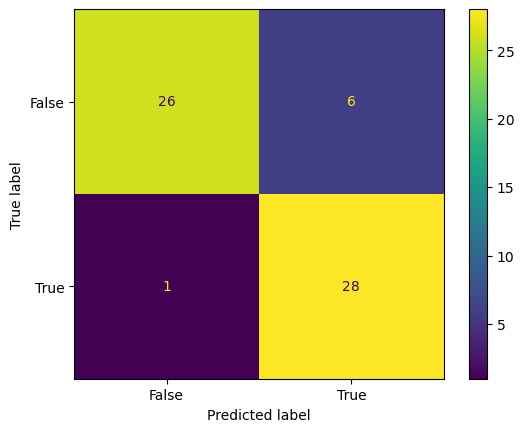

In [15]:
cm = confusion_matrix(y_true=y_test , y_pred=test_pred)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
cm_display.plot()
plt.show()

In [16]:
score= accuracy_score(test_pred,y_test)
print("Accuracy percentage",score*100,"%")

Accuracy percentage 88.52459016393442 %


# 4.Saving the model

In [17]:
joblib.dump(model, "Heart Disease Predictor.joblib")

['Heart Disease Predictor.joblib']

In [18]:
load_model = joblib.load("Heart Disease Predictor.joblib")

In [19]:
load_model

LogisticRegression(max_iter=1000)

In [20]:
 input_data = [72,2,2,160,0,140,0,2.5,0,0,2]

In [21]:
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1, -1)
prediction = load_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
        print("Person doesn't have heart disease")
else:
        print("Person have heart disease")

[0]
Person doesn't have heart disease


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
